# Importing libraries and data

In [1]:
from kmodes.kmodes import KModes

In [2]:
from sklearn import preprocessing

In [3]:
from kmodes.kprototypes import KPrototypes

In [4]:
from sklearn.datasets import make_blobs

In [5]:
import itertools
import matplotlib as mpl
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.plotting import plot_learning_curves
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.ensemble import AdaBoostClassifier
from sklearn.cluster import KMeans

pd.set_option('display.max_columns', None)

In [6]:
banking_df = pd.read_csv(r'C:\Users\alden\Desktop\data science labs\data for final project\final\train.csv', sep=";")

# Banking dataset

In [7]:
banking_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [8]:
#getting the shape of the data
banking_df.shape

(45211, 17)

In [9]:
#finding the breakdown of target variable
banking_df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

# Data Cleaning

In [10]:
#checking suspicious columns
for i in banking_df.columns:
    print(i)
    print(banking_df[i].value_counts())
    print('--------------------------------------------------------------------------')

age
32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: age, Length: 77, dtype: int64
--------------------------------------------------------------------------
job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
--------------------------------------------------------------------------
marital
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
--------------------------------------------------------------------------
education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
--------------------------------------------------------------------------
default
no     44396
yes      815
Name: d

### List of columns with and without unknowns 

<b> With unknowns <b/>
    
    
    -job
    -education
    -contact
    -poutcome
    
<b> Without unknowns <b/>
    
    
    -age
    -martical
    -default
    -balance
    -housing
    -loan
    -contact
    -day
    -month
    -duration
    -campaign
    -pdays
    -previous
    -poutcome
    -deposit

In [11]:
#seeing which columns contain the word 'unknown' as this is equivalent to a null value 
banking_df.eq('unknown').sum()

age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36959
y                0
dtype: int64

In [12]:
#dropping columns with too many null values 
banking_df.drop(['poutcome', 'contact'], axis=1, inplace= True)

In [13]:
#printing new list of columns after removing poutcome and contact columns
banking_df.eq('unknown').sum()

age             0
job           288
marital         0
education    1857
default         0
balance         0
housing         0
loan            0
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
y               0
dtype: int64

In [14]:
#dropping rows which contain unknown values from the 'job' and 'education' columns
# df[df[“column_name”].str.contains(“string”)==False]
banking_clean = banking_df[banking_df['job'].str.contains('unknown')==False]
banking_clean = banking_clean[banking_clean['education'].str.contains('unknown')==False]

In [15]:
#rechecking dataset for null values
banking_clean.eq('unknown').sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
y            0
dtype: int64

In [16]:
#checking the shape of our data 
banking_clean.shape

(43193, 15)

In [17]:
#checking the info of our data 
banking_clean.info()
#there are no null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43193 entries, 0 to 45210
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        43193 non-null  int64 
 1   job        43193 non-null  object
 2   marital    43193 non-null  object
 3   education  43193 non-null  object
 4   default    43193 non-null  object
 5   balance    43193 non-null  int64 
 6   housing    43193 non-null  object
 7   loan       43193 non-null  object
 8   day        43193 non-null  int64 
 9   month      43193 non-null  object
 10  duration   43193 non-null  int64 
 11  campaign   43193 non-null  int64 
 12  pdays      43193 non-null  int64 
 13  previous   43193 non-null  int64 
 14  y          43193 non-null  object
dtypes: int64(7), object(8)
memory usage: 5.3+ MB


In [18]:
#checking summary statistics for the numerical values 
banking_clean.describe()

,age,balance,day,duration,campaign,pdays,previous
count,43193.000000,43193.000000,43193.000000,43193.000000,43193.000000,43193.000000,43193.000000
mean,40.764082,1354.027342,15.809414,258.323409,2.758178,40.404070,0.584863
std,10.512640,3042.103625,8.305970,258.162006,3.063987,100.420624,2.332672
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,71.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,442.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1412.000000,21.000000,318.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,58.000000,871.000000,275.000000


In [19]:
#changing y to a dummy variable
banking_clean['y'].value_counts().sort_index()

no     38172
yes     5021
Name: y, dtype: int64

### Feature engineering 

Pdays has a large number of '-1' values. this corresponds with the client was not previously contacted.

In [20]:
banking_clean['pdays'].value_counts()
# there are 35281 values of '-1'

-1      35281
 182      151
 92       138
 183      120
 91       115
        ...  
 687        1
 551        1
 670        1
 32         1
 530        1
Name: pdays, Length: 557, dtype: int64

In [21]:
# changing pdays to the categorical variable 'previously_contacted' 
banking_clean['previously_contacted'] = banking_clean['pdays'].replace(-1, 0)
banking_clean.loc[~(banking_clean['previously_contacted'] == 0), 'previously_contacted'] = 1

In [22]:
#dropping 'pdays'
banking_clean.drop('pdays', inplace=True, axis=1)

In [23]:
# dummy coding variables
# y
banking_clean['y'].replace({'no':'0','yes':'1'}, inplace=True)
banking_clean['y'] = pd.to_numeric(banking_clean['y'])

#education
banking_clean['education'].replace({'primary':'0', 'secondary':'1', 'tertiary':'2'}, inplace=True)
# banking_clean['education'] = pd.to_numeric(banking_clean['education'])
banking_clean['education']

0        2
1        1
2        1
5        2
6        2
        ..
45206    2
45207    0
45208    1
45209    1
45210    1
Name: education, Length: 43193, dtype: object

In [24]:
#creating dummy variable for job for corr matrix
banking_for_corr = banking_clean

In [25]:
banking_for_corr = pd.concat([banking_for_corr, pd.get_dummies(banking_for_corr['job'])], axis=1)

In [26]:
banking_for_corr

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,previous,y,previously_contacted,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed
0,58,management,married,2,no,2143,yes,no,5,may,261,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,44,technician,single,1,no,29,yes,no,5,may,151,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,33,entrepreneur,married,1,no,2,yes,yes,5,may,76,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
5,35,management,married,2,no,231,yes,no,5,may,139,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
6,28,management,single,2,no,447,yes,yes,5,may,217,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,2,no,825,no,no,17,nov,977,3,0,1,0,0,0,0,0,0,0,0,0,0,1,0
45207,71,retired,divorced,0,no,1729,no,no,17,nov,456,2,0,1,0,0,0,0,0,0,1,0,0,0,0,0
45208,72,retired,married,1,no,5715,no,no,17,nov,1127,5,3,1,1,0,0,0,0,0,1,0,0,0,0,0
45209,57,blue-collar,married,1,no,668,no,no,17,nov,508,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0


# EDA

In [27]:
#checking statiscal summary of information 

banking_clean.describe()

,age,balance,day,duration,campaign,previous,y,previously_contacted
count,43193.000000,43193.000000,43193.000000,43193.000000,43193.000000,43193.000000,43193.000000,43193.000000
mean,40.764082,1354.027342,15.809414,258.323409,2.758178,0.584863,0.116246,0.183178
std,10.512640,3042.103625,8.305970,258.162006,3.063987,2.332672,0.320523,0.386817
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,33.000000,71.000000,8.000000,103.000000,1.000000,0.000000,0.000000,0.000000
50%,39.000000,442.000000,16.000000,180.000000,2.000000,0.000000,0.000000,0.000000
75%,48.000000,1412.000000,21.000000,318.000000,3.000000,0.000000,0.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,58.000000,275.000000,1.000000,1.000000


- the average age is 40.7
- the average balance is $1365
- the average duration for a call is 258 seconds 


<AxesSubplot:>

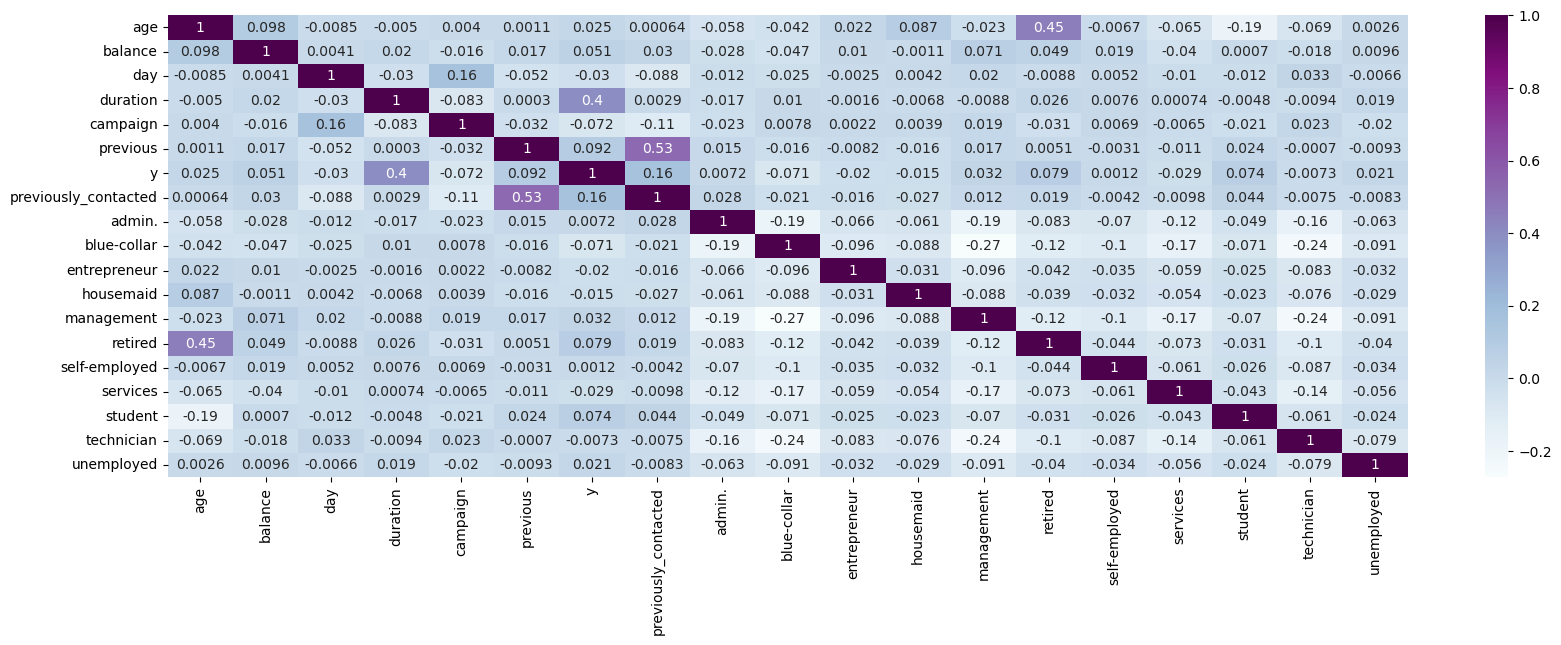

In [28]:
#correlation matrix 

plt.figure(figsize=(20, 6))
sns.heatmap(banking_for_corr.corr(), annot= True,cmap="BuPu")

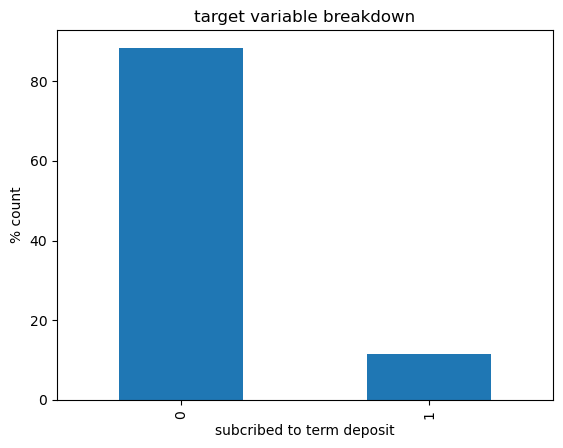

0    88.375431
1    11.624569
Name: y, dtype: float64

In [29]:
#breakdown of target variable
(banking_clean['y'].value_counts(normalize=True) * 100).plot(kind='bar')
plt.ylabel('% count')
plt.xlabel('subcribed to term deposit')
plt.title('target variable breakdown')
plt.show()

banking_clean['y'].value_counts(normalize=True) * 100

the base-line values of whether they subscribed to the term deposit or not is 88% no and 11% yes 

In [30]:
# defining a function to create a countplot with % breakdown 
sns.set_theme(style="darkgrid")
def makeattritionplotwithpercent(i, data):
    fig_dims = (12, 4)
    fig, ax = plt.subplots(figsize=fig_dims)
    sns.countplot(x=data[i], hue='y', data= data)
    bars = ax.patches
    half = int(len(bars)/2)
    left_bars = bars[:half]
    right_bars = bars[half:]
    for left, right in zip(left_bars, right_bars):
            height_l = left.get_height()
            height_r = right.get_height()
            total = height_l + height_r
            ax.text(left.get_x() + left.get_width()/2., height_l + 10, '{0:.0%}'.format(height_l/total), ha="center")
            ax.text(right.get_x() + right.get_width()/2., height_r + 10, '{0:.0%}'.format(height_r/total), ha="center")
    

    mylabels = ['No','Yes']
    ax.legend(labels=mylabels)

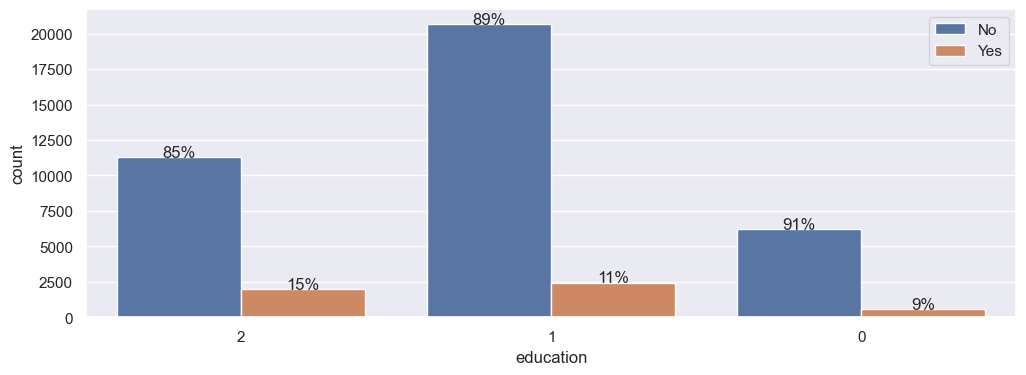

In [31]:
#count plot showing breakdown of target variable with age

makeattritionplotwithpercent('education', banking_clean) #using this 

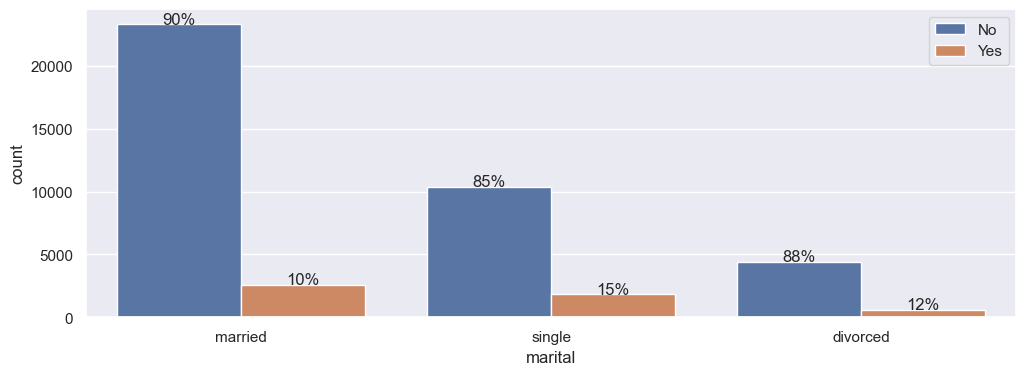

In [32]:
#count plot showing breakdown of target variable with marital status

makeattritionplotwithpercent('marital', banking_clean)

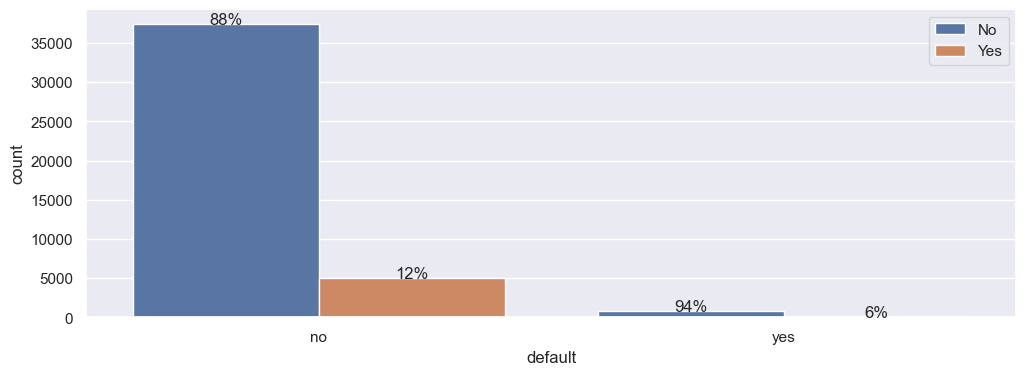

In [33]:
##count plot showing breakdown of target variable with default status

makeattritionplotwithpercent('default', banking_clean) #using this 

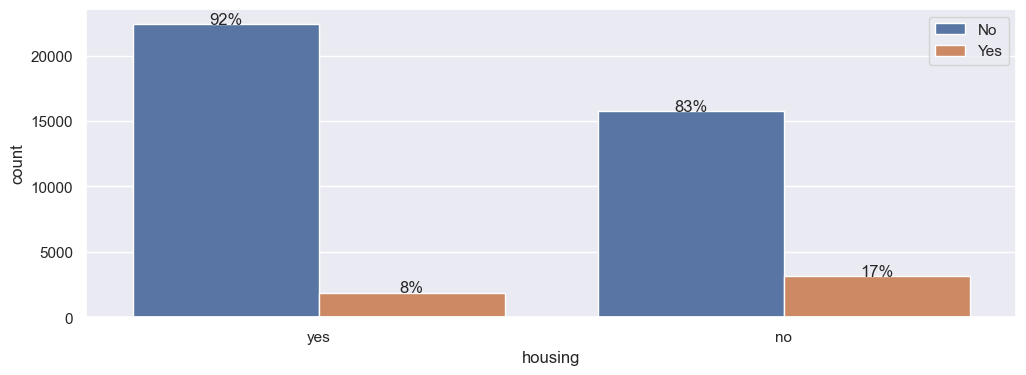

In [34]:
##count plot showing breakdown of target variable with housing loan status

makeattritionplotwithpercent('housing', banking_clean) #using this 

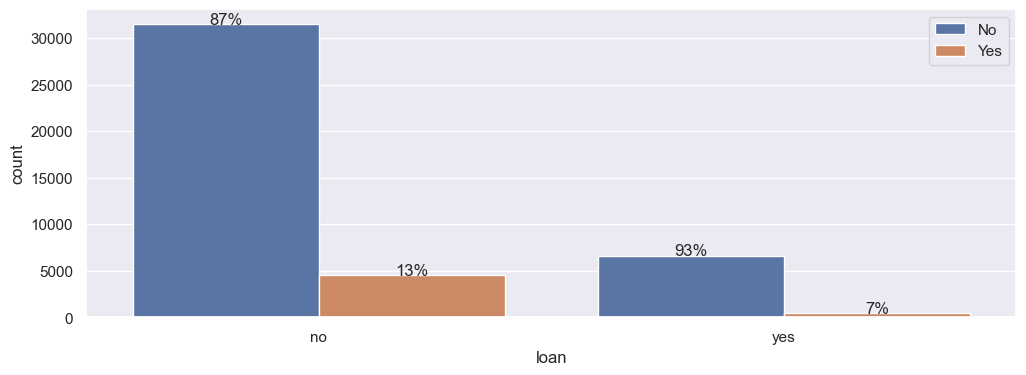

In [35]:
#count plot showing breakdown of target variable with personal loan status

makeattritionplotwithpercent('loan', banking_clean)

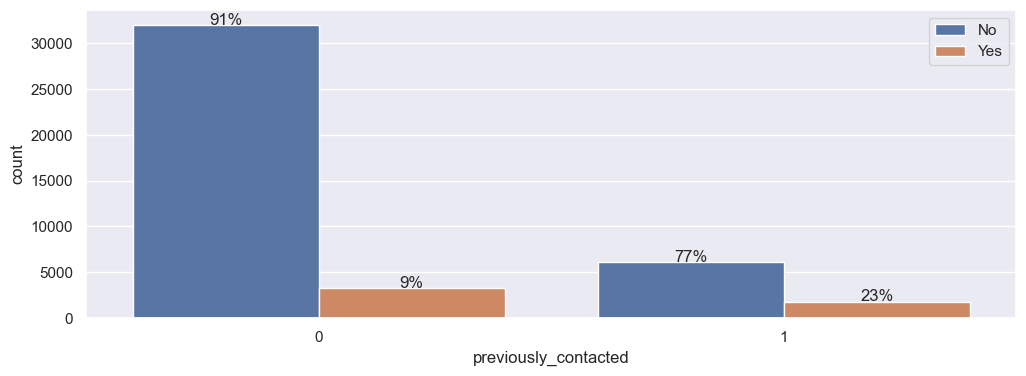

In [36]:
#count plot showing breakdown of target variable with previously contacted status

makeattritionplotwithpercent('previously_contacted', banking_clean) #using this 

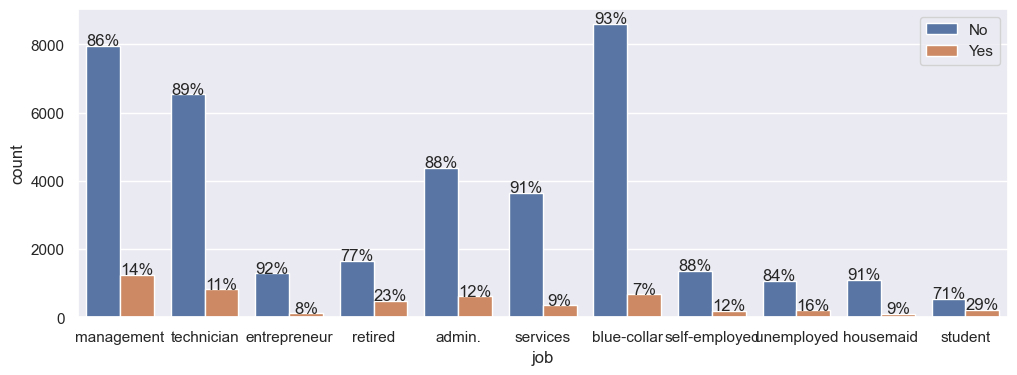

In [37]:
#count plot showing breakdown of target variable with job

makeattritionplotwithpercent('job', banking_clean) #using this 

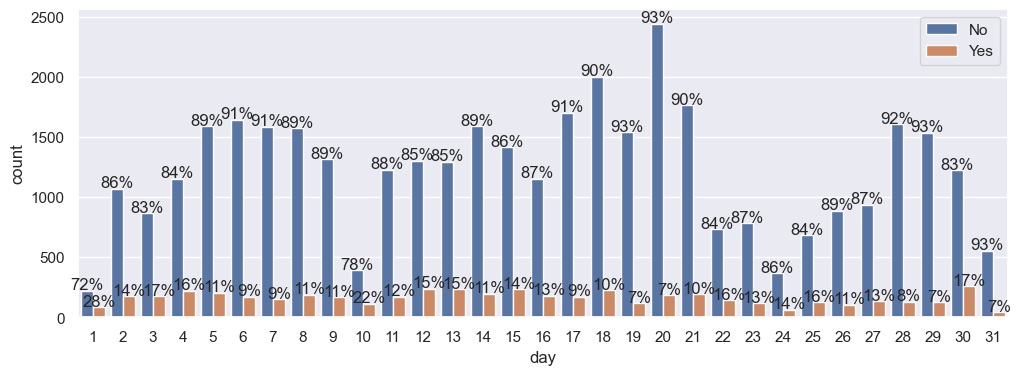

In [38]:
#count plot showing breakdown of target variable with day of contact

makeattritionplotwithpercent('day', banking_clean) #using this 

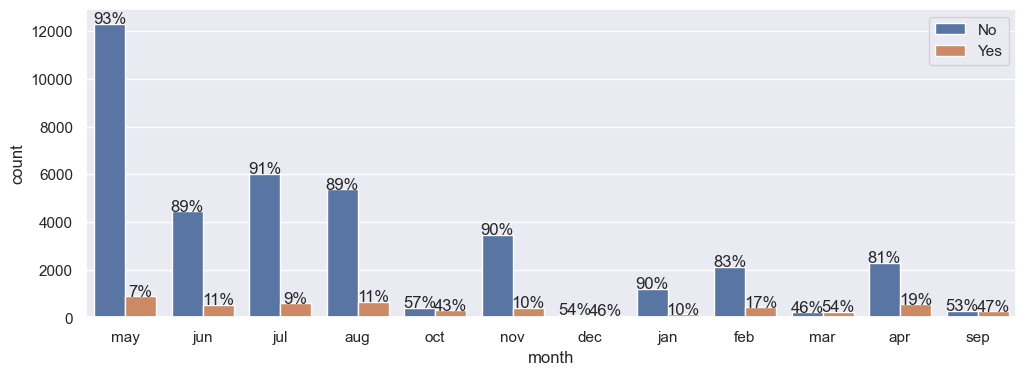

In [39]:
#count plot showing breakdown of target variable with month 

makeattritionplotwithpercent('month', banking_clean) #using this 

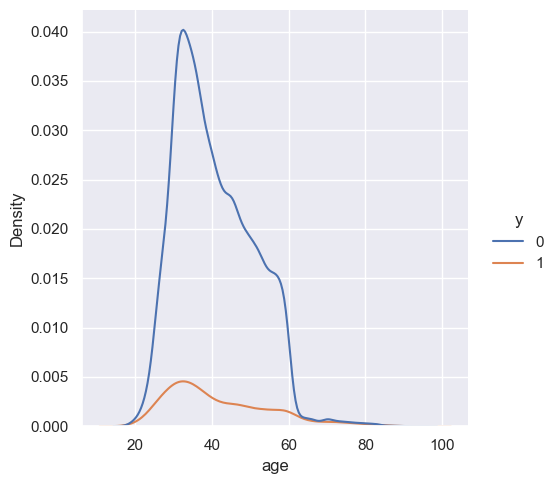

In [66]:
#distribution plot showing distributions of age for different classes of target

sns.displot(data=banking_clean, x='age', hue='y',kind="kde") 

(-200.0, 2000.0)

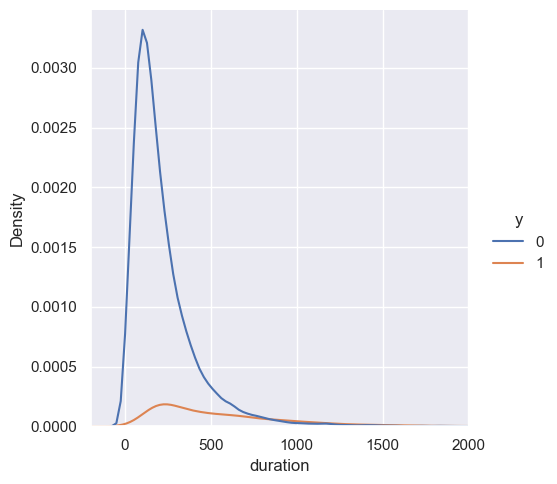

In [41]:
#distribution plot showing distributions of duration for different classes of target

sns.displot(data=banking_clean, x='duration', hue='y',kind="kde") #using this 
plt.xlim(-200, 2000)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


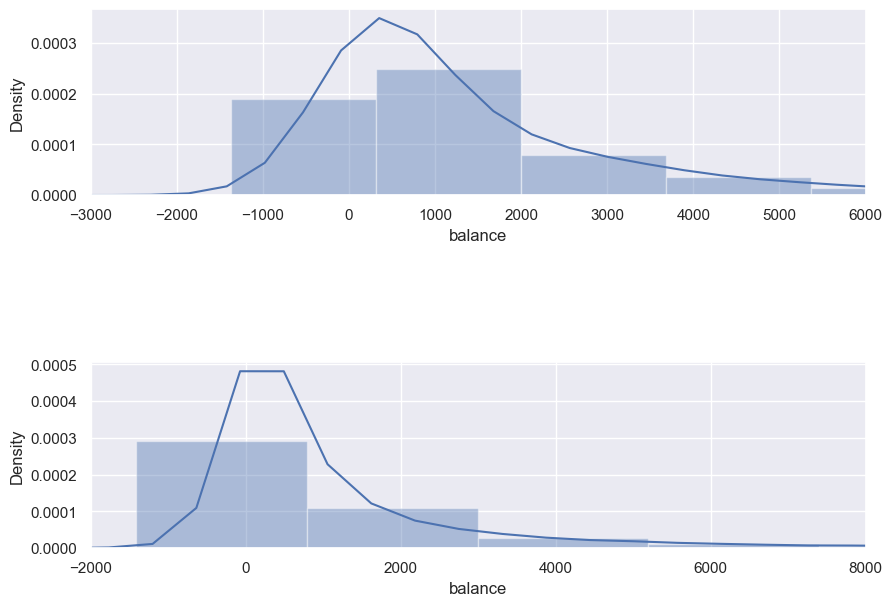

In [42]:
#dist plot showing distribution of target bank balance for different classes of target variable 

yes = banking_clean[banking_clean['y']==1]
no = banking_clean[banking_clean['y']==0]

fig = plt.figure(figsize = (10,7))

ax1 = fig.add_subplot(2, 1, 1)
ax1 = sns.distplot(yes['balance'])
plt.xlim(-3000, 6000)

ax2 = fig.add_subplot(2, 1, 2)
ax2 = sns.distplot(no['balance'])
plt.xlim(-2000, 8000)


plt.subplots_adjust(hspace=0.9)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


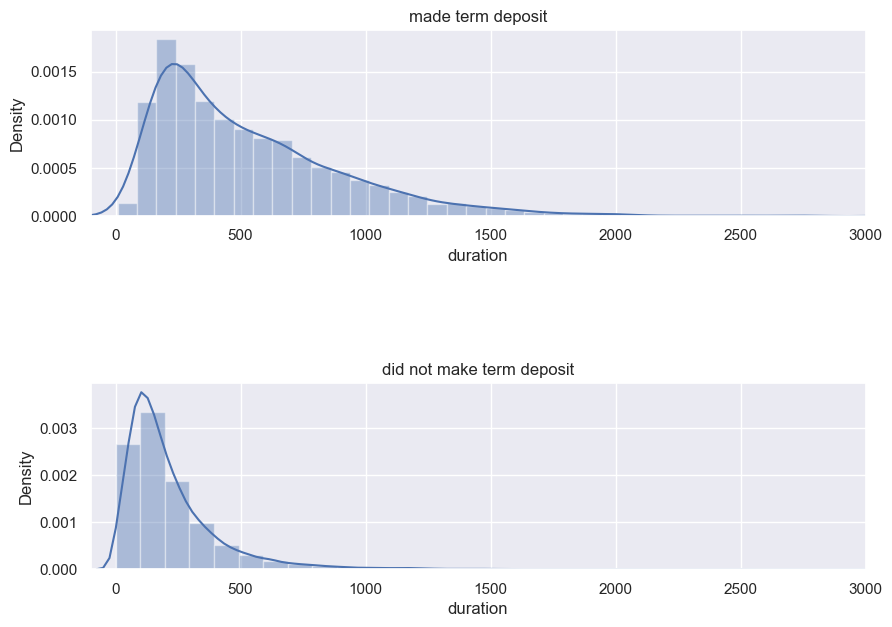

In [43]:
#dist plot showing distribution of call duration for different classes of target variable 

yes = banking_clean[banking_clean['y']==1]
no = banking_clean[banking_clean['y']==0]

fig = plt.figure(figsize = (10,7))

ax1 = fig.add_subplot(2, 1, 1)
ax1 = sns.distplot(yes['duration'])
plt.title('made term deposit')
plt.xlim(-100, 3000)

ax2 = fig.add_subplot(2, 1, 2)
ax2 = sns.distplot(no['duration'])
plt.title('did not make term deposit')
plt.xlim(-100, 3000)


plt.subplots_adjust(hspace=0.9)